# Softmax


Note: Your softmax(x) function should return a NumPy array of the same shape as x.
For example, given a list or one-dimensional array (which is interpreted as a column vector representing a single sample).

The probabilities for each sample (column) must sum to 1. Feel free to test your function with these inputs.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



In [2]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    ar = np.array(x)
    f = lambda r : np.exp(r) / np.sum(np.exp(r))
    return np.apply_along_axis( f, axis=0, arr=ar )


In [3]:
test1 = [1.0, 2.0, 3.0]
softmax(test1)

array([ 0.09003057,  0.24472847,  0.66524096])







It should return a one-dimensional array of the same length, i.e. 3 elements:


[ 0.09003057  0.24472847  0.66524096]

----
Given a 2-dimensional array where each column represents a sample, like:


In [4]:
scores = np.array([[1, 2, 3, 6],
                   [2, 4, 5, 6],
                   [3, 8, 7, 6]])

It should return a 2-dimensional array of the same shape, (3, 4):

In [5]:
# [[ 0.09003057  0.00242826  0.01587624  0.33333333]
#  [ 0.24472847  0.01794253  0.11731043  0.33333333]
#  [ 0.66524096  0.97962921  0.86681333  0.33333333]]

In [6]:
softmax(scores)

array([[ 0.09003057,  0.00242826,  0.01587624,  0.33333333],
       [ 0.24472847,  0.01794253,  0.11731043,  0.33333333],
       [ 0.66524096,  0.97962921,  0.86681333,  0.33333333]])

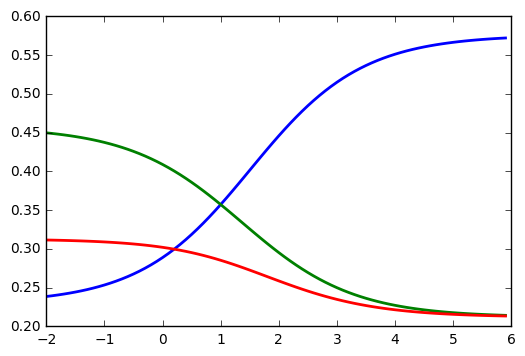

In [7]:
x = np.arange(-2.0, 6.0, 0.1)
scores = np.vstack([x, np.ones_like(x), 0.2 * np.ones_like(x)])

plt.plot(x, softmax(softmax(scores)).T, linewidth=2)
plt.show()




### Multiply softmax scores by 10 & see what happens...

In [8]:
scores = np.array([3., 1., 2.])
softmax(scores * 10.)

array([  9.99954600e-01,   2.06106005e-09,   4.53978686e-05])

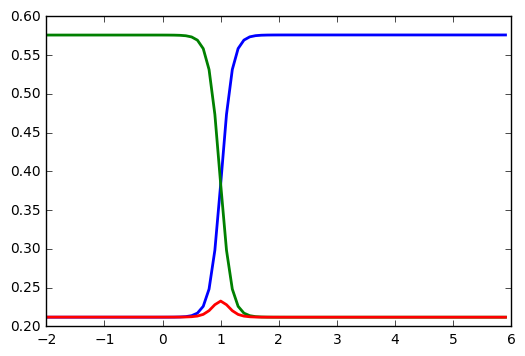

In [9]:
x = np.arange(-2.0, 6.0, 0.1)
scores = np.vstack([x, np.ones_like(x), 0.2 * np.ones_like(x)])

plt.plot(x, softmax(softmax(scores * 10.)).T, linewidth=2)
plt.show()


values get closer to 0 or 1.

### Now divide by 10...

In [10]:
scores = np.array([3., 1., 2.])
softmax(scores / 10.)

array([ 0.3671654 ,  0.30060961,  0.33222499])

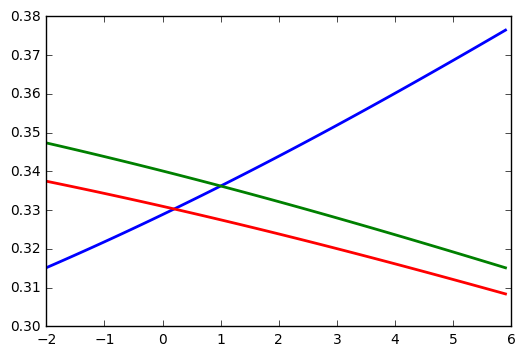

In [11]:
x = np.arange(-2.0, 6.0, 0.1)
scores = np.vstack([x, np.ones_like(x), 0.2 * np.ones_like(x)])
plt.plot(x, softmax(softmax(scores / 10.)).T, linewidth=2)
plt.show()

Probabilities become closer to the uniform Distribution.


### This Means:


If you increase the size of the output: $S(y * 10 )$ the classifier becomes very confident about it's predictions. 

Whereas decreasing the size $S(y / 10 )$  makes the classifier less confident.


---


# One-Hot Encoding

just means 1.0 for correct class and 0. for incorrrect classes.

for example:

$S(y) - > [.7 , .2 , .1] -> [1. , 0. , 0.]$


each class gets a unique position on the vector. 

*for large numbers of classes this can become very large!*

---
# Cross Entropy

where $S(y)$ is scoring function results

and $L$ represents one-hot encoded matrix

$$D(S, L) = -\sum_{i} L_{i} \log(S_{i}) $$


This looks scary but is just the distance between the two probabiliy vectors $S$ & $L$.

#### BE CAREFUL:

the cross entropy is not symetric!
$$D(S, L ) \neq  D( L, S)$$

there's a $_log$ in there. $L$ by definition has a bunch of 0. in it and all values in  $S$ will always be greater than 0.

---

# Recap : Multinomial Logistic Classification

input -> linear model => logit -> softmax => cross-entropy -> hot-labels
 
 
 $x$   ->   $W{x + b}$  =>    $y$  ->   $S(y)$  =>   $D(S,L)$  ->   $L$

####  broken down :


- input $x$ is turned into logit $y$ using a linear model $Wx +b$ which is a matrix multiply by some weight $W$ and a bias $b$.


- then logits (scores) $y$ are fed into softmax $S(y)$ which turns them into probabilites.


- then compare $S(y)$ to the one-hot encoded labels $L$ using cross-entopy funtion $D( S, L)$

so :
$$D ( S ( Wx+b ), L ) $$

---

# Minimizing Cross Entropy

how will we get values for $W$ and $b$ so that 
    
$D(A , a)$ is low and $D(A, b)$ is high?

in otherwords where the distance to the incorrect class is high and the distance to the correct class is low

### Training Loss

the average cross-entropy over the entire training set. 

$$\mathcal{L} = (1/N) \sum_{i} D( S (Wx_{i} + b ), L_{i}) $$


Every example in training set gets multiplied by this big matrix. 

---


# Numerical Stability

Dealing with numbers that are too large or too small  can cause loads of errors



### a good guiding principle:
we always want variables to have 0 mean and equal variance whenever possible

**good:**

* mean  $X_{i} = 0$

* variance $\sigma(X_{i}) = \sigma(X_{i})$

A badly conditioned problem will also make more work for the optimizer. 

#### with images:
* taking RGB values (0 -  255) and subtracting and dividing 128 will not change the content of the image and will make it easier to process.
    

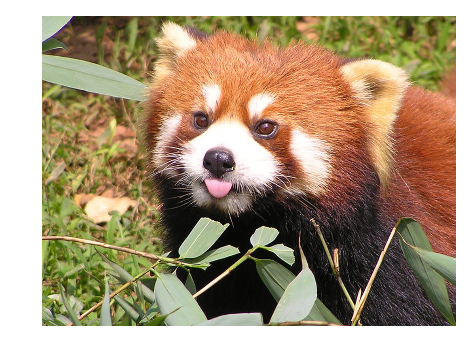

In [12]:
red_panda = mpimg.imread('./unit1_data/rp.jpg')
plt.imshow(red_panda)
plt.axis("off")
plt.show()

normal style non-converted adorable red panda

In [13]:
def rgb_reduce(rgb):
    return (rgb -128.) / 128.


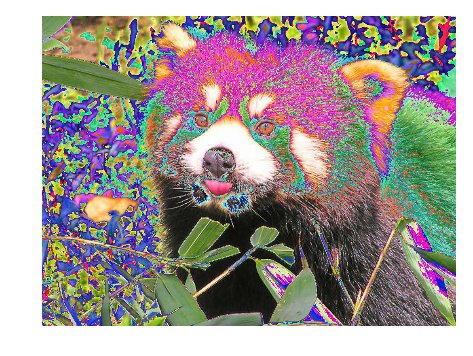

In [14]:
plt.imshow(rgb_reduce(red_panda))
plt.axis("off")
plt.show()

wierd converted panda.

# Weight initilization

A simple general method :

draw weights randomly with gaussian dist with a mean of 0 and a std deviation $\sigma$:

A large $\sigma$ will be more peaky. Best to begin with a small $\sigma$ to reflect our initial uncertainty.